# Exploratory data analysis

### Object of analysis: Airbnb apartments in Paris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('/Users/katerina/Documents/jupyter/listings.csv')
df_m = pd.read_csv('/Users/katerina/Downloads/listings(madrid).csv')

In [16]:
df_m

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,4,102,2022-11-29,0.66,1,61,18,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,33,2018-07-15,0.33,2,346,0,NaN
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,25,2022-10-16,0.26,1,73,10,NaN
3,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,2,173,2022-11-23,1.13,1,345,19,NaN
4,37921,Piso barrio de salamanca,162926,Sergio,Salamanca,Recoletos,40.423250,-3.682810,Private room,20,3,0,NaN,NaN,1,291,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20771,779864034353423768,Habitación individual y baño,82781578,Alberto,Barajas,Aeropuerto,40.454986,-3.584427,Private room,42,1,0,NaN,NaN,1,365,0,NaN
20772,780168420093352936,Visit Central Madrid w/ Friends & Family !,413881187,Adam,Centro,Embajadores,40.410884,-3.702173,Entire home/apt,112,1,0,NaN,NaN,1,28,0,NaN
20773,780281142182756633,Apartamento Plaza De Castilla M (CAS224),460712642,Victoria,Chamartín,Castilla,40.469088,-3.687143,Entire home/apt,117,1,0,NaN,NaN,4,20,0,NaN
20774,780325020069234563,Mit House Rubik I en Madrid,377605855,Marco,Ciudad Lineal,Pueblo Nuevo,40.434037,-3.639478,Entire home/apt,75,1,0,NaN,NaN,240,68,0,NaN


There are 56739 rows in the dataset, meaning there are 56739 apartments available to rent through Airbnb in Paris as of 2022.

#### Here is the list of all the features present in the dataset:

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### First let's explore the proportion of room types:

In [5]:
sns.set_theme(style='whitegrid', 
              font='serif', 
              palette='pastel')

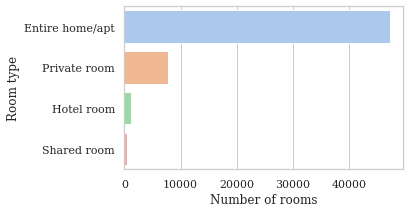

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index)
plt.xlabel('Number of rooms')
plt.ylabel('Room type')
plt.show()

In [7]:
df.groupby(['room_type'])['id'].count()

room_type
Entire home/apt    47394
Hotel room          1104
Private room        7852
Shared room          389
Name: id, dtype: int64



Подавляющая часть жилья, сдаваемого парижанами на Airbnb - целые квартиры/апартаменты. Также можно отметить, что в Париже не пользуются популярностью комнаты на несколько человек (комнаты в хостелах).

# 3. Столбчатая диаграмма, показывающая число комнат в зависимости от их занятости в течение прошедшего года

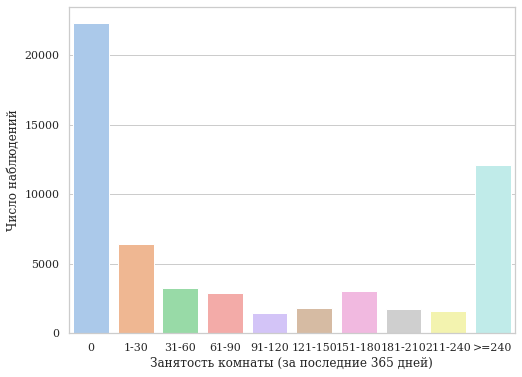

In [8]:
bins = pd.cut(df['availability_365'], np.append(np.arange(-30,270,30), np.inf))

plt.figure(figsize=(8,6))
graph = sns.countplot(data=df, x=bins)
plt.xlabel('Занятость комнаты (за последние 365 дней)')
plt.ylabel('Число наблюдений')
graph.set_xticklabels(['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '>=240']);
plt.show()

##### Оказалось, что большая часть апартаментов пустует целый год. Вторая по величине группа апартаментов - занятость более 240 дней, таких апартаментов более 10 тыс. Всего в датасете более 56 тыс квартир. Получается, есть относительно небольшая группа квартир, особенно пользующаяся популярностью среди  приезжающих в Париж.

# 4. Круговая диаграмма, показывающая число комнат в зависимости от того, есть ли у них лицензия на краткосрочную сдачу

### Посчитаем долю каждого типа апартаментов (по лицензии) 

In [9]:
no_lic = round((sum(df['license'].isna()) / len(df['license'])) * 100, 1)
exempt = round(np.nansum(df['license'].str.startswith('Exempt')) / len(df['license']) * 100, 1)
lic = round(100 - (no_lic + exempt), 1)

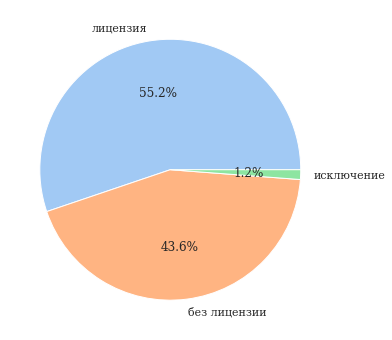

In [10]:
labels = 'лицензия', 'без лицензии', 'исключение'
sizes = [lic, no_lic, exempt]
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

# 5. Cтолбчатая диаграмма,показывающая число комнат в зависимости от минимального срока аренды

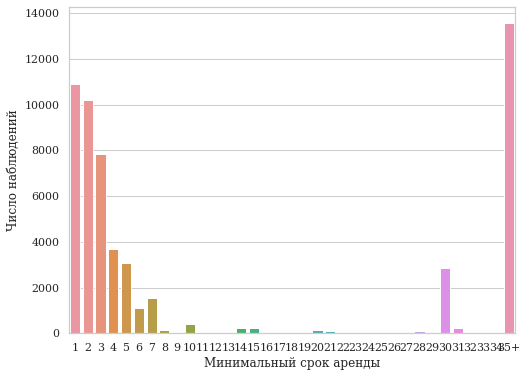

In [11]:
bins = pd.cut(df['minimum_nights'], np.append(np.arange(35), np.inf))

plt.figure(figsize=(8,6))
graph = sns.countplot(data=df, x=bins)
plt.xlabel('Минимальный срок аренды')
plt.ylabel('Число наблюдений')
graph.set_xticklabels([str(i) for i in range(1,35)] + ['35+'])
plt.show()

# 6. Столбчатая диаграмма, показывающая число комнат в зависимости от того, сколько комнат упраляется одним арендодателем

### Добавим столбец с количеством квартир на каждого арендодателя

In [12]:
df['room_counts'] = df.groupby('host_id').id.transform('count')

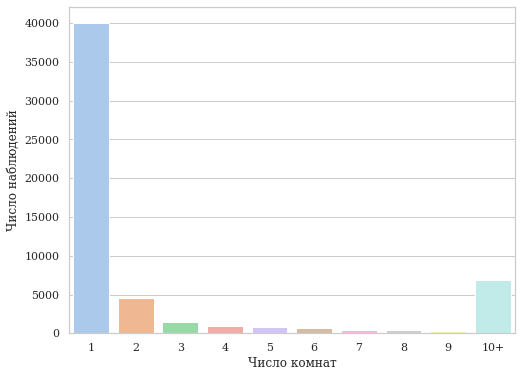

In [13]:
bins = pd.cut(df['room_counts'], np.append(np.arange(10), np.inf))

plt.figure(figsize=(8,6))
graph = sns.countplot(data=df, x=bins)
plt.xlabel('Число комнат')
plt.ylabel('Число наблюдений')
graph.set_xticklabels([str(i) for i in range(1,10)] + ['10+'])
plt.show()

# 7. Рисуем арендуемые комнаты на карте Парижа

In [14]:
df_7 = df[df['neighbourhood'] == 'Panthéon']

import branca.colormap as cm
linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_7['availability_365'].min(), vmax=df_7['availability_365'].max())

In [15]:
location = (df_7['latitude'].mean()-0.005, df_7['longitude'].mean())
m = folium.Map(location=location, zoom_start=14)

for _,row in df_7.iterrows():
    folium.CircleMarker(radius=2, location=(row['latitude'], row['longitude']), color=linear(row.availability_365), fill_color=linear(row.availability_365), fill=True).add_to(m) 

from IPython.display import display
display(m)

##### Градация по занятости от зелёного до красного (красный - занятость наибольшее количество дней в году)